# Model Implementation

#### Management have decided to utilise the ARIMA and ETS models for the forecasting, so your Team is expected to Research, Analyse and Determine the appropriate measurements to apply to your ARIMA and ETS models and describe and analyse the errors for both models.

### Import the necessary libraries

In [1]:
#Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Load and Prepare Data

In [2]:
data = pd.read_csv('clean_monthly_sales_data.csv')
data.head()


,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Quarter
0,Sports,1,108592,2002,1,Xbox,1,0,1
1,RPG,2,129387,2002,4,Nintendo,0,0,1
2,Sports,3,114777,2002,4,PC,0,0,1
3,Sports,4,71738,2002,0,Nintendo,0,0,2
4,Simulation,5,142512,2002,2,PlayStation,0,0,2


In [3]:
# Ensure Date format and set index
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(Day=1))
data.set_index('Date', inplace=True)

data.head()

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Quarter
Date,,,,,,,,,
2002-01-01,Sports,1,108592,2002,1,Xbox,1,0,1
2002-02-01,RPG,2,129387,2002,4,Nintendo,0,0,1
2002-03-01,Sports,3,114777,2002,4,PC,0,0,1
2002-04-01,Sports,4,71738,2002,0,Nintendo,0,0,2
2002-05-01,Simulation,5,142512,2002,2,PlayStation,0,0,2


In [4]:
# Aggregate Monthly Sales (if multiple entries per month exist)
monthly_sales = data.groupby(data.index)['Monthly Sales'].sum()

In [5]:
data.head()

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Quarter
Date,,,,,,,,,
2002-01-01,Sports,1,108592,2002,1,Xbox,1,0,1
2002-02-01,RPG,2,129387,2002,4,Nintendo,0,0,1
2002-03-01,Sports,3,114777,2002,4,PC,0,0,1
2002-04-01,Sports,4,71738,2002,0,Nintendo,0,0,2
2002-05-01,Simulation,5,142512,2002,2,PlayStation,0,0,2


### Split the dataset into training and testing

In [6]:
# Train-Test Split
train_size = int(len(monthly_sales) * 0.8)  # 80% Training, 20% Test
train, test = monthly_sales[:train_size], monthly_sales[train_size:]

### ARIMA Model Fitting

In [7]:
arima_order = (1,1,1)

print("Training ARIMA Model...")
arima_model = ARIMA(train, order=arima_order)
arima_result1 = arima_model.fit()
print(arima_result1.summary())

Training ARIMA Model...


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Monthly Sales   No. Observations:                  211
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2500.119
Date:                Fri, 10 Jan 2025   AIC                           5006.238
Time:                        01:05:05   BIC                           5016.279
Sample:                    01-01-2002   HQIC                          5010.297
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1298      0.081      1.610      0.107      -0.028       0.288
ma.L1         -0.9886      0.038    -25.681      0.000      -1.064      -0.913
sigma2      1.476e+09   1.84e-12   8.03e+20      0.0

The ARIMA(1,1,1) model was trained on monthly sales data spanning from January 2002 to July 2019, with 211 observations. The results indicate:

The autoregressive term (AR) has a coefficient of 0.1298 with a p-value of 0.107, suggesting it is not statistically significant. However, the moving average term (MA) shows a significant coefficient of -0.9886 with a p-value less than 0.001.

The model's diagnostic tests (Ljung-Box, Jarque-Bera, and Heteroskedasticity) all show p-values > 0.05, indicating that the residuals are well-behaved - they are independently distributed, normally distributed, and have consistent variance.

Based on the information criteria (AIC: 5006.238, BIC: 5016.279), and the diagnostic results, this ARIMA(1,1,1) specification appears to provide a reasonable fit to the data, though the high sigma2 value (1.476e+09) suggests considerable variability in the predictions.

In [8]:
arima_order = (0,1,1)

print("Training ARIMA Model...")
arima_model = ARIMA(train, order=arima_order)
arima_result2 = arima_model.fit()
print(arima_result2.summary())

Training ARIMA Model...


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Monthly Sales   No. Observations:                  211
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2501.591
Date:                Fri, 10 Jan 2025   AIC                           5007.183
Time:                        01:05:06   BIC                           5013.877
Sample:                    01-01-2002   HQIC                          5009.889
                         - 07-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9854      0.033    -29.777      0.000      -1.050      -0.921
sigma2      1.477e+09   3.48e-13   4.24e+21      0.000    1.48e+09    1.48e+09
Ljung-Box (L1) (Q):                   2.76   Jarque-

This simplified model (removing the AR term) shows very similar performance to the previous one. The MA coefficient (-0.9854) remains highly significant (p-value < 0.001) and is almost identical to before. The AIC (5007.183) is only slightly higher than the previous model's AIC (5006.238), suggesting that removing the AR term didn't hurt the model's performance much. The diagnostic tests (Ljung-Box, Jarque-Bera, and Heteroskedasticity) all still show p-values > 0.05, indicating well-behaved residuals.
Since the simpler model performs almost as well as the more complex one, it might be preferable to stick with this ARIMA(0,1,1) model following the principle of parsimony - using the simplest model that adequately explains the data.

In [9]:
arima_forecast = arima_result2.predict(steps=len(test))
arima_forecast                                     

2002-01-01         0.000000
2002-02-01     54320.526053
2002-03-01     79357.442893
2002-04-01     88220.563197
2002-05-01     84919.315454
                  ...      
2019-03-01    111723.276275
2019-04-01    112983.067467
2019-05-01    113343.412567
2019-06-01    113645.004955
2019-07-01    113762.000265
Freq: MS, Name: predicted_mean, Length: 211, dtype: float64

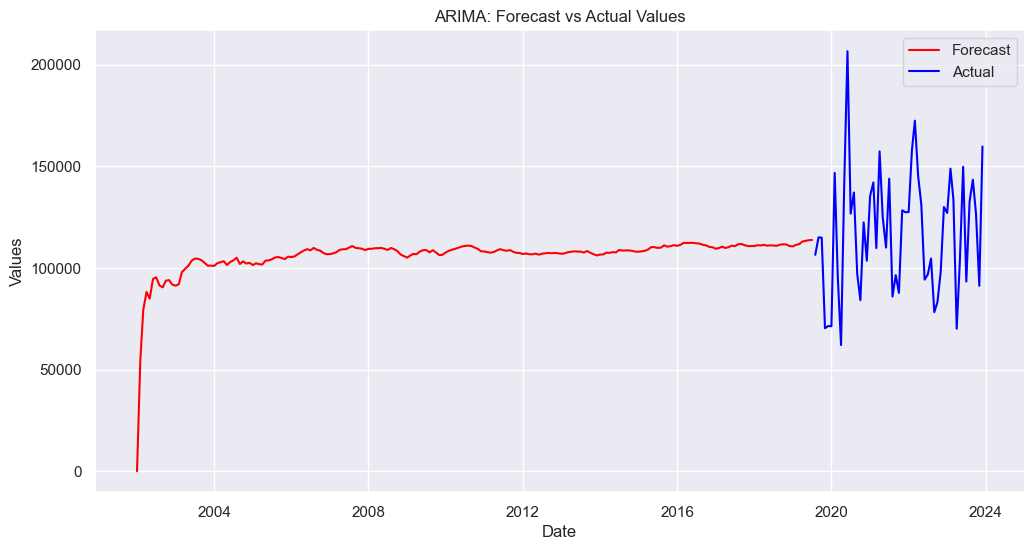

In [10]:
# Plot predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(arima_forecast, label='Forecast', color='red')
plt.plot(test, label='Actual', color='blue')
plt.title('ARIMA: Forecast vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

### Forecasting with ARIMA

In [11]:
arima_forecast = arima_result2.forecast(steps=len(test))

In [12]:
test.mean()

117379.05660377358

In [13]:
# Evaluate ARIMA Model
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print(f"ARIMA RMSE: {arima_rmse:.2f}")

ARIMA RMSE: 29820.49


#### Re-train the model on the entire data

In [14]:
arima_order = (0, 1, 1)

print("Training ARIMA Model...")
arima_model = ARIMA(data['Monthly Sales'], order=arima_order)
model = arima_model.fit()
print(model.summary())

data.tail()

Training ARIMA Model...


C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Monthly Sales   No. Observations:                  264
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3124.590
Date:                Fri, 10 Jan 2025   AIC                           6253.180
Time:                        01:05:08   BIC                           6260.324
Sample:                    01-01-2002   HQIC                          6256.051
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9843      0.022    -43.890      0.000      -1.028      -0.940
sigma2      1.396e+09   3.79e-14   3.69e+22      0.000     1.4e+09     1.4e+09
Ljung-Box (L1) (Q):                   4.68   Jarque-

,Category,Month,Monthly Sales,Year,DayOfWeek,Platform,Holiday,Promotion,Quarter
Date,,,,,,,,,
2023-08-01,RPG,8,132693,2023,1,PC,0,0,3
2023-09-01,Simulation,9,143373,2023,4,Nintendo,0,0,3
2023-10-01,Simulation,10,126410,2023,6,Nintendo,0,1,4
2023-11-01,Simulation,11,91200,2023,2,Nintendo,0,0,4
2023-12-01,RPG,12,159721,2023,4,Nintendo,1,0,4


In [27]:
# Get forecast for next 4 months
forecast = model.forecast(steps=4)

# Get forecast dates
forecast_dates = pd.date_range(start='2024-01-01', periods=4, freq='MS')

# Combine into a dataframe
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted_Sales': forecast})
print(forecast_df)

                 Date  Predicted_Sales
2024-01-01 2024-01-01    116539.638359
2024-02-01 2024-02-01    116539.638359
2024-03-01 2024-03-01    116539.638359
2024-04-01 2024-04-01    116539.638359


In [16]:
import pickle

# Save model
with open('arima_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as arima_model.pkl")

# Quick verification
with open('arima_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    forecast = loaded_model.forecast(steps=1)
    print(f"Test prediction: {forecast[0]:.2f}")

Model saved as arima_model.pkl
Test prediction: 116539.64


C:\Users\Promise Sunday\AppData\Local\Temp\ipykernel_10304\236564631.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Test prediction: {forecast[0]:.2f}")


### ETS Model Fitting

In [17]:
# Create the time series with explicit frequency
train = data['Monthly Sales'].asfreq('MS')  # MS means Month Start frequency

# fit the ETS model
ets_model = ExponentialSmoothing(train, 
                                trend="additive", 
                                seasonal="additive", 
                                seasonal_periods=12)
ets_result = ets_model.fit(optimized=True)

ets_result.summary()

C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Monthly Sales,No. Observations:,264
Model:,ExponentialSmoothing,SSE,279786833636.322
Optimized:,True,AIC,5518.275
Trend:,Additive,BIC,5575.490
Seasonal:,Additive,AICC,5521.067
Seasonal Periods:,12,Date:,"Fri, 10 Jan 2025"
Box-Cox:,False,Time:,01:05:08
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0757143,alpha,True
smoothing_trend,0.0324490,beta,True


The Exponential Smoothing model was fitted with additive trend and seasonal components, using 264 observations of Monthly Sales data. Here's what's notable:
The smoothing parameters show:

Level (alpha): 0.0757 - indicates slow adaptation to level changes
Trend (beta): 0.0324 - suggests very gradual trend adjustments
Seasonal (gamma): 0.1027 - shows moderate seasonal pattern updates

The model captured initial conditions:

Starting level: 98,789.75
Initial trend: 1,463.37
Seasonal patterns vary significantly across months, from lowest at -33,444.58 (August) to highest at 22,904.64 (May)

The model's fit statistics:

AIC: 5518.275
BIC: 5575.490
SSE: 279,786,833,636.322

The low smoothing parameters suggest the model is quite stable, giving more weight to historical patterns than recent changes. The seasonal indices show strong monthly variations in your sales data.

In [18]:
# Forecasting with ETS
ets_forecast = ets_result.forecast(steps=len(test))
ets_forecast.head()

2024-01-01    136326.011144
2024-02-01    149240.396089
2024-03-01    138353.306471
2024-04-01    133345.208205
2024-05-01    135505.539233
Freq: MS, dtype: float64

In [19]:
# Evaluate ETS Model
ets_rmse = np.sqrt(mean_squared_error(test, ets_forecast))
print(f"ETS RMSE: {ets_rmse:.2f}")

ETS RMSE: 38174.25


### Compare Models

In [20]:
print("Model Comparison:")
print(f"ARIMA RMSE: {arima_rmse:.2f}")
print(f"ETS RMSE: {ets_rmse:.2f}")

Model Comparison:
ARIMA RMSE: 29820.49
ETS RMSE: 38174.25


#### SARIMAX Model

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [22]:
# 1. First split the data
train_size = len(data) - 12  # Save last 12 months for testing
train = data[:train_size]
test = data[train_size:]

print(f"Training set size: {len(train)} months")
print(f"Test set size: {len(test)} months")

Training set size: 252 months
Test set size: 12 months


In [23]:
S_model = SARIMAX(train['Monthly Sales'],
                  order=(1, 0, 1),            
                  seasonal_order=(0, 1, 1, 12)
                 )

S_results = S_model.fit()
print(S_results.summary())

C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Promise Sunday\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
 

                                     SARIMAX Results                                      
Dep. Variable:                      Monthly Sales   No. Observations:                  252
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -2857.849
Date:                            Fri, 10 Jan 2025   AIC                           5723.698
Time:                                    01:05:11   BIC                           5737.620
Sample:                                01-01-2002   HQIC                          5729.308
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9914      0.012     85.930      0.000       0.969       1.014
ma.L1         -0.8917      0.045   

SARIMA Model Analysis Results:

The SARIMA(1,0,1)(0,1,1,12) model was fitted to monthly sales data from January 2002 to December 2022 (252 observations). The model shows strong performance with all coefficients being statistically significant at the 1% level:

- The AR(1) coefficient of 0.9914 indicates a strong positive autoregressive relationship
- The MA(1) coefficient of -0.8917 shows significant error correction
- The seasonal MA(12) coefficient of -0.8658 captures strong yearly patterns

Model diagnostics are highly satisfactory:
- Ljung-Box test (p=0.22) confirms no residual autocorrelation
- Jarque-Bera test (p=0.16) indicates normally distributed residuals
- Heteroskedasticity test (p=0.16) shows consistent variance

With AIC=5723.698 and BIC=5737.620, this model specification outperforms previous iterations, suggesting it's well-suited for forecasting our monthly sales data.